In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from janitor import clean_names

In [3]:
df = pd.read_excel('Training_Data-1.xlsx')

In [4]:
#clean column names
df = df.clean_names()

In [5]:
#check for missing values of all the columns
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_values_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage (%)': missing_percentage
})

missing_values_summary

,Missing Values,Missing Percentage (%)
date,0,0.000000
week#,0,0.000000
play_id,0,0.000000
drive_id,0,0.000000
quarter,0,0.000000
remaining_time_in_the_quarter_mm_ss_,0,0.000000
down,121,0.356333
to_go,0,0.000000
yard_line_0_100,0,0.000000
offensive_team,0,0.000000


In [6]:
#replace the missing values in 'down' with the mode
df['down'] = df['down'].fillna(df['down'].mode()[0])

In [7]:
#drop the columns with high missing value percentages
columns_to_drop = [
    'points_scored\nby_either_team',
    'yards_gained',
    'date']
df.drop(columns=columns_to_drop, errors='ignore', inplace=True)

In [8]:
# Define the new column names
new_column_names = [
    "week",
    "play_id",
    "drive_id",
    "quarter",
    "time_remaining",
    "down",
    "to_go",
    "yard_line",
    "offensive_team",
    "defensive_team",
    "venue",
    "road_score",
    "home_score",
    "score_differential",
    "play_type"]

# Assign new column names to the DataFrame
df.columns = new_column_names

In [9]:
df.head()

,week,play_id,drive_id,quarter,time_remaining,down,to_go,yard_line,offensive_team,defensive_team,venue,road_score,home_score,score_differential,play_type
0,1,3,1,1,15:00:00,1.0,10,75,DET,KC,Road,0,0,0,Run
1,1,4,1,1,14:29:00,2.0,3,68,DET,KC,Road,0,0,0,Pass
2,1,5,1,1,14:25:00,3.0,3,68,DET,KC,Road,0,0,0,Pass
3,1,7,2,1,14:09:00,1.0,10,87,KC,DET,Home,0,0,0,Run
4,1,8,2,1,13:34:00,2.0,5,82,KC,DET,Home,0,0,0,Run


In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['play_type_numeric'] = label_encoder.fit_transform(df['play_type'])

In [11]:

# Convert 'time_remaining' in datetime.time format to total seconds
df['time_remaining_sec'] = (
    df['time_remaining'].apply(lambda x: x.hour * 60 + x.minute + x.second)
)

# Drop the original column for simplicity
df.drop(columns=['time_remaining'], inplace=True)

# Display a sample of the updated DataFrame
df.head()

,week,play_id,drive_id,quarter,down,to_go,yard_line,offensive_team,defensive_team,venue,road_score,home_score,score_differential,play_type,play_type_numeric,time_remaining_sec
0,1,3,1,1,1.0,10,75,DET,KC,Road,0,0,0,Run,1,900
1,1,4,1,1,2.0,3,68,DET,KC,Road,0,0,0,Pass,0,869
2,1,5,1,1,3.0,3,68,DET,KC,Road,0,0,0,Pass,0,865
3,1,7,2,1,1.0,10,87,KC,DET,Home,0,0,0,Run,1,849
4,1,8,2,1,2.0,5,82,KC,DET,Home,0,0,0,Run,1,814


In [12]:
# Apply One-Hot Encoding 
df = pd.get_dummies(df, columns=['offensive_team', 'defensive_team', 'venue'], drop_first=True)

# Display a sample of the updated DataFrame
df.head()

,week,play_id,drive_id,quarter,down,to_go,yard_line,road_score,home_score,score_differential,...,defensive_team_NYG,defensive_team_NYJ,defensive_team_PHI,defensive_team_PIT,defensive_team_SEA,defensive_team_SF,defensive_team_TB,defensive_team_TEN,defensive_team_WAS,venue_Road
0,1,3,1,1,1.0,10,75,0,0,0,...,False,False,False,False,False,False,False,False,False,True
1,1,4,1,1,2.0,3,68,0,0,0,...,False,False,False,False,False,False,False,False,False,True
2,1,5,1,1,3.0,3,68,0,0,0,...,False,False,False,False,False,False,False,False,False,True
3,1,7,2,1,1.0,10,87,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,1,8,2,1,2.0,5,82,0,0,0,...,False,False,False,False,False,False,False,False,False,False


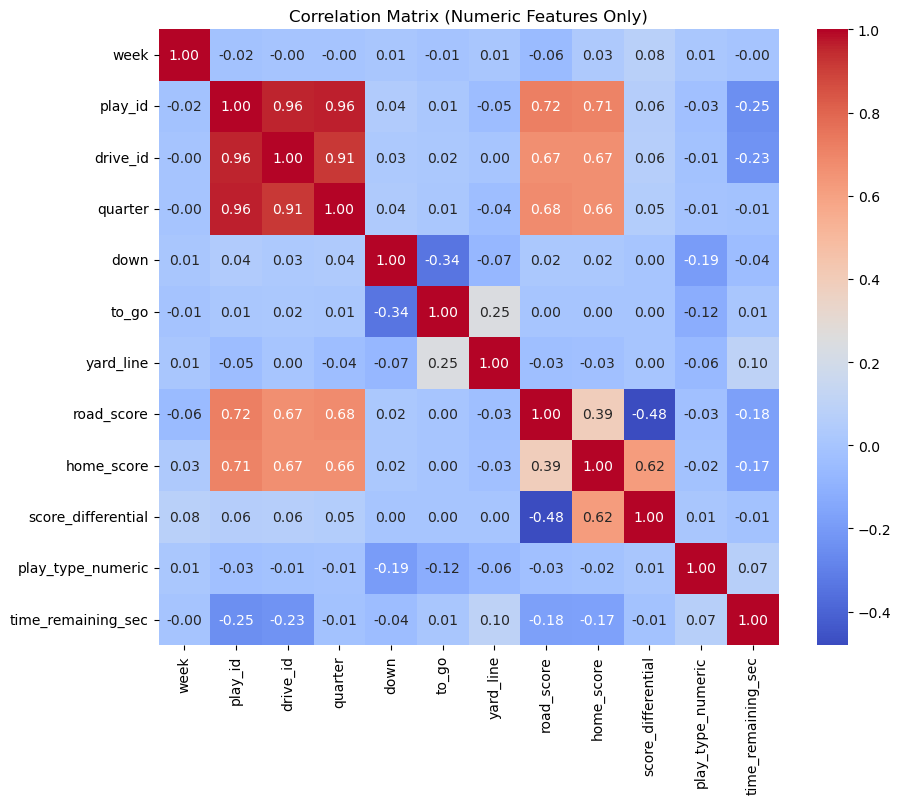

In [13]:
# Ensure only numeric columns are used for correlation
numeric_columns = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()

In [14]:
# Export the DataFrame to a CSV file in the current working directory
#df.to_csv('processed_data.csv', index=False)

# Confirm the file is saved
#print("File saved as 'processed_data.csv'")

In [15]:
df['in_red_zone'] = df['yard_line'].apply(lambda x: 1 if x >= 80 else 0)
# Retry plotting the distribution of play_type with in_red_zone as the hue
# plt.figure(figsize=(10, 6))
# sns.countplot(data=df, x='play_type', hue=df['in_red_zone'].astype('category'))
# plt.title("Distribution of Play Type with Red Zone Indicator")
# plt.xlabel("Play Type (Run = 0, Pass = 1)")
# plt.ylabel("Count")
# plt.legend(title="In Red Zone", labels=["Outside Red Zone", "Inside Red Zone"])
# plt.show()

In [26]:
red_zone_play_type = df.groupby('in_red_zone')['play_type'].value_counts(normalize=True)
print(red_zone_play_type)

in_red_zone  play_type
0            Pass         0.581033
             Run          0.418967
1            Pass         0.582504
             Run          0.417496
Name: proportion, dtype: float64


In [31]:
df['red_zone_section'] = pd.cut(df['yard_line'], bins=[0, 79, 89, 100], labels=['Outside', 'Mid Red Zone', 'Goal-to-Go'])

In [33]:
red_zone_play_type = df.groupby('red_zone_section')['play_type'].value_counts(normalize=True)
print(red_zone_play_type)

red_zone_section  play_type
Outside           Pass         0.581033
                  Run          0.418967
Mid Red Zone      Pass         0.607291
                  Run          0.392709
Goal-to-Go        Pass         0.516093
                  Run          0.483907
Name: proportion, dtype: float64


C:\Users\sleep\AppData\Local\Temp\ipykernel_29612\3996949976.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  red_zone_play_type = df.groupby('red_zone_section')['play_type'].value_counts(normalize=True)


In [35]:
df = pd.get_dummies(df, columns=['red_zone_section'], drop_first=True)
df.head()

,week,play_id,drive_id,quarter,down,to_go,yard_line,road_score,home_score,score_differential,...,defensive_team_PIT,defensive_team_SEA,defensive_team_SF,defensive_team_TB,defensive_team_TEN,defensive_team_WAS,venue_Road,in_red_zone,red_zone_section_Mid Red Zone,red_zone_section_Goal-to-Go
0,1,3,1,1,1.0,10,75,0,0,0,...,False,False,False,False,False,False,True,0,False,False
1,1,4,1,1,2.0,3,68,0,0,0,...,False,False,False,False,False,False,True,0,False,False
2,1,5,1,1,3.0,3,68,0,0,0,...,False,False,False,False,False,False,True,0,False,False
3,1,7,2,1,1.0,10,87,0,0,0,...,False,False,False,False,False,False,False,1,True,False
4,1,8,2,1,2.0,5,82,0,0,0,...,False,False,False,False,False,False,False,1,True,False


In [37]:
df['quarter_type'] = df['quarter'].apply(lambda x: 'first_half' if x in [1, 2] else 'second_half')
df = pd.get_dummies(df, columns=['quarter_type'], drop_first=True)  # One-hot encode

In [39]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Variables for StandardScaler
standard_scaler_columns = ['time_remaining_sec', 'score_differential', 'yard_line', 'road_score', 'home_score']

# Variables for MinMaxScaler
minmax_scaler_columns = ['to_go']
# Apply StandardScaler to the appropriate columns
df[standard_scaler_columns] = standard_scaler.fit_transform(df[standard_scaler_columns])

# Apply MinMaxScaler to the appropriate columns
df[minmax_scaler_columns] = minmax_scaler.fit_transform(df[minmax_scaler_columns])

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Select numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64'])

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = numerical_features.columns
vif_data['VIF'] = [
    variance_inflation_factor(numerical_features.values, i)
    for i in range(numerical_features.shape[1])
]
print(vif_data)

               Feature         VIF
0                 week    4.049342
1              play_id  341.157401
2             drive_id   50.911649
3              quarter  264.311884
4                 down    4.986675
5                to_go    5.017977
6            yard_line    1.394726
7           road_score         inf
8           home_score         inf
9   score_differential         inf
10  time_remaining_sec    3.769352
11         in_red_zone    1.441141


C:\Users\sleep\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [43]:
df.drop(columns=['home_score', 'road_score', 'play_id','drive_id','quarter','play_type'], inplace=True)
df.drop(columns=['offensive_team_ATL', 'offensive_team_BAL', 'offensive_team_CAR',
    'offensive_team_CHI', 'offensive_team_CIN', 'offensive_team_DEN',
    'offensive_team_IND', 'offensive_team_JAX', 'offensive_team_LAC',
    'offensive_team_LV', 'offensive_team_MIN', 'offensive_team_NE',
    'offensive_team_NO', 'offensive_team_NYG', 'offensive_team_NYJ',
    'offensive_team_SEA', 'offensive_team_TEN', 'offensive_team_WAS',
    'defensive_team_ATL', 'defensive_team_BAL', 'defensive_team_CAR',
    'defensive_team_CHI', 'defensive_team_CIN', 'defensive_team_DEN',
    'defensive_team_IND', 'defensive_team_JAX', 'defensive_team_LAC',
    'defensive_team_LV', 'defensive_team_MIN', 'defensive_team_NE',
    'defensive_team_NO', 'defensive_team_NYG', 'defensive_team_NYJ',
    'defensive_team_SEA', 'defensive_team_TEN', 'defensive_team_WAS'],inplace=True)
print(df.columns.tolist())

['week', 'down', 'to_go', 'yard_line', 'score_differential', 'play_type_numeric', 'time_remaining_sec', 'offensive_team_BUF', 'offensive_team_CLE', 'offensive_team_DAL', 'offensive_team_DET', 'offensive_team_GB', 'offensive_team_HOU', 'offensive_team_KC', 'offensive_team_LA', 'offensive_team_MIA', 'offensive_team_PHI', 'offensive_team_PIT', 'offensive_team_SF', 'offensive_team_TB', 'defensive_team_BUF', 'defensive_team_CLE', 'defensive_team_DAL', 'defensive_team_DET', 'defensive_team_GB', 'defensive_team_HOU', 'defensive_team_KC', 'defensive_team_LA', 'defensive_team_MIA', 'defensive_team_PHI', 'defensive_team_PIT', 'defensive_team_SF', 'defensive_team_TB', 'venue_Road', 'in_red_zone', 'red_zone_section_Mid Red Zone', 'red_zone_section_Goal-to-Go', 'quarter_type_second_half']


In [45]:
#Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Define features (X) and target variable (y)
X = df.drop(columns=['play_type_numeric'])  # Replace with your actual target column if different
y = df['play_type_numeric']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression with L2 Regularization (Ridge)
log_reg = LogisticRegression(penalty='l2', solver='liblinear')
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6283863368669023

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.77      0.71      3955
           1       0.57      0.43      0.49      2837

    accuracy                           0.63      6792
   macro avg       0.61      0.60      0.60      6792
weighted avg       0.62      0.63      0.62      6792



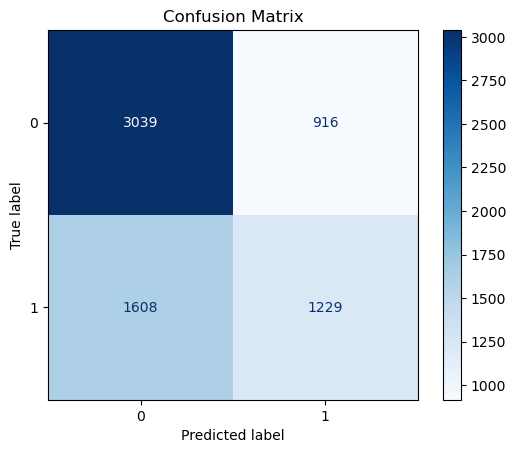

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=log_reg.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


In [49]:
test = pd.read_excel('Test_Data.xlsx')

In [51]:
#clean column names
test = test.clean_names()
#replace the missing values in 'down' with the mode
test['down'] = test['down'].fillna(test['down'].mode()[0])
#drop the columns with high missing value percentages
#drop the columns with high missing value percentages
columns_to_drop = [
    'points_scored\nby_either_team',
    'yards_gained',
    'date',
     'pass_outcome_complete_\nincomplete_\nsack',
 'pass_length_short_\ndeep',
 'pass_location_left_\nmiddle_\nright',
 'air_yards',
 'yards_after_catch_\n_yac_',
 'run_location_left_\nmiddle_\nright',
 'touchdown_pass_offensive_td_\nrush_offensive_td_\nreturn_defensive_td',
'road_team','home_team']

test.drop(columns=columns_to_drop, errors='ignore', inplace=True)
test.columns.tolist()

['week#',
 'play_id',
 'drive_id',
 'quarter',
 'remaining_time_in_the_quarter_mm_ss_',
 'down',
 'to_go',
 'yard_line_0_100',
 'offensive_team',
 'defensive_team',
 'offensive_\nteam_venue_\nroad_\nhome_\nneutral',
 'road_teams_accumulated_score',
 'home_teams_accumulated_score',
 'score\ndifferential\n_home_teams_score_\n_\n_road_teams_score_',
 'play_type']

In [53]:
new_column_names = [
    "week",
    "play_id",
    "drive_id",
    "quarter",
    "time_remaining",
    "down",
    "to_go",
    "yard_line",
    "offensive_team",
    "defensive_team",
    "venue",
    "road_score",
    "home_score",
    "score_differential",
    "play_type"]
test.columns = new_column_names
test.columns.tolist()

['week',
 'play_id',
 'drive_id',
 'quarter',
 'time_remaining',
 'down',
 'to_go',
 'yard_line',
 'offensive_team',
 'defensive_team',
 'venue',
 'road_score',
 'home_score',
 'score_differential',
 'play_type']

In [55]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
test['play_type_numeric'] = label_encoder.fit_transform(test['play_type'])
# Convert 'time_remaining' in datetime.time format to total seconds
test['time_remaining_sec'] = (
    test['time_remaining'].apply(lambda x: x.hour * 60 + x.minute + x.second)
)

# Drop the original column for simplicity
test.drop(columns=['time_remaining'], inplace=True)

In [57]:
# Apply One-Hot Encoding 
test = pd.get_dummies(test, columns=['offensive_team', 'defensive_team', 'venue'], drop_first=True)


In [59]:
test['in_red_zone'] = test['yard_line'].apply(lambda x: 1 if x >= 80 else 0)
red_zone_play_type = test.groupby('in_red_zone')['play_type'].value_counts(normalize=True)
print(red_zone_play_type)

in_red_zone  play_type
0            Pass         0.600658
             Run          0.399342
1            Pass         0.609756
             Run          0.390244
Name: proportion, dtype: float64


In [61]:
test['red_zone_section'] = pd.cut(test['yard_line'], bins=[0, 79, 89, 100], labels=['Outside', 'Mid Red Zone', 'Goal-to-Go'])
red_zone_play_type = test.groupby('red_zone_section')['play_type'].value_counts(normalize=True)
print(red_zone_play_type)
test = pd.get_dummies(test, columns=['red_zone_section'], drop_first=True)


red_zone_section  play_type
Outside           Pass         0.600658
                  Run          0.399342
Mid Red Zone      Pass         0.655556
                  Run          0.344444
Goal-to-Go        Run          0.515152
                  Pass         0.484848
Name: proportion, dtype: float64


C:\Users\sleep\AppData\Local\Temp\ipykernel_29280\931464849.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  red_zone_play_type = test.groupby('red_zone_section')['play_type'].value_counts(normalize=True)


In [63]:
test['quarter_type'] = test['quarter'].apply(lambda x: 'first_half' if x in [1, 2] else 'second_half')
test = pd.get_dummies(test, columns=['quarter_type'], drop_first=True)  # One-hot encode

In [65]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Variables for StandardScaler
standard_scaler_columns = ['time_remaining_sec', 'score_differential', 'yard_line', 'road_score', 'home_score']

# Variables for MinMaxScaler
minmax_scaler_columns = ['to_go']
# Apply StandardScaler to the appropriate columns
test[standard_scaler_columns] = standard_scaler.fit_transform(test[standard_scaler_columns])

# Apply MinMaxScaler to the appropriate columns
test[minmax_scaler_columns] = minmax_scaler.fit_transform(test[minmax_scaler_columns])

In [67]:
test.drop(columns=['home_score', 'road_score', 'play_id','drive_id','quarter','play_type'], inplace=True)
# Display all column names
print(test.columns.tolist())


['week', 'down', 'to_go', 'yard_line', 'score_differential', 'play_type_numeric', 'time_remaining_sec', 'offensive_team_BUF', 'offensive_team_CLE', 'offensive_team_DAL', 'offensive_team_DET', 'offensive_team_GB', 'offensive_team_HOU', 'offensive_team_KC', 'offensive_team_LA', 'offensive_team_MIA', 'offensive_team_PHI', 'offensive_team_PIT', 'offensive_team_SF', 'offensive_team_TB', 'defensive_team_BUF', 'defensive_team_CLE', 'defensive_team_DAL', 'defensive_team_DET', 'defensive_team_GB', 'defensive_team_HOU', 'defensive_team_KC', 'defensive_team_LA', 'defensive_team_MIA', 'defensive_team_PHI', 'defensive_team_PIT', 'defensive_team_SF', 'defensive_team_TB', 'venue_Road', 'in_red_zone', 'red_zone_section_Mid Red Zone', 'red_zone_section_Goal-to-Go', 'quarter_type_second_half']


In [69]:
from sklearn.metrics import accuracy_score, classification_report

# Define features (X_test) and target (y_test) from the test dataset
X_test = test.drop(columns=['play_type_numeric'])  # Drop the target column
y_test = test['play_type_numeric']  # Target column

# Make predictions using the trained logistic regression model
y_pred = log_reg.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.6390748630553865

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.91      0.75       988
           1       0.63      0.22      0.33       655

    accuracy                           0.64      1643
   macro avg       0.64      0.57      0.54      1643
weighted avg       0.64      0.64      0.58      1643



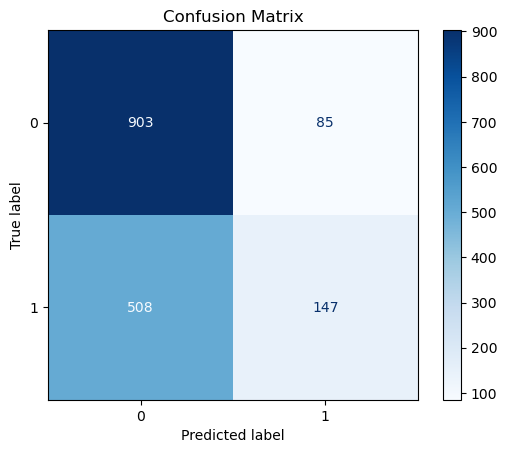

In [71]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=log_reg.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


In [74]:
X_train = X_train.astype({col: 'int' for col in X_train.select_dtypes('bool').columns})
X_test = X_test.astype({col: 'int' for col in X_test.select_dtypes('bool').columns})
print(X_train.dtypes)

week                               int64
down                             float64
to_go                            float64
yard_line                        float64
score_differential               float64
time_remaining_sec               float64
offensive_team_BUF                 int32
offensive_team_CLE                 int32
offensive_team_DAL                 int32
offensive_team_DET                 int32
offensive_team_GB                  int32
offensive_team_HOU                 int32
offensive_team_KC                  int32
offensive_team_LA                  int32
offensive_team_MIA                 int32
offensive_team_PHI                 int32
offensive_team_PIT                 int32
offensive_team_SF                  int32
offensive_team_TB                  int32
defensive_team_BUF                 int32
defensive_team_CLE                 int32
defensive_team_DAL                 int32
defensive_team_DET                 int32
defensive_team_GB                  int32
defensive_team_H

In [76]:
import statsmodels.api as sm

# Add a constant to the features for the intercept
X_train_sm = sm.add_constant(X_train)

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Print the summary to see coefficients, p-values, etc.
print(result.summary())

# Extracting p-values, coefficients, and other stats from the results
summary_df = result.summary2().tables[1]

# Filter for statistically significant features (P < 0.05)
significant_features = summary_df[summary_df['P>|z|'] < 0.05]

print(significant_features)

Optimization terminated successfully.
         Current function value: 0.631404
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:      play_type_numeric   No. Observations:                27165
Model:                          Logit   Df Residuals:                    27128
Method:                           MLE   Df Model:                           36
Date:                Sun, 17 Nov 2024   Pseudo R-squ.:                 0.07147
Time:                        17:45:59   Log-Likelihood:                -17152.
converged:                       True   LL-Null:                       -18472.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             2.0241      0.069     29.433      0.

SVM Accuracy: 0.6254416961130742

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.79      0.71      3955
           1       0.58      0.39      0.47      2837

    accuracy                           0.63      6792
   macro avg       0.61      0.59      0.59      6792
weighted avg       0.62      0.63      0.61      6792



C:\Users\sleep\AppData\Local\Temp\ipykernel_29280\379006587.py:27: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  disp.figure_.show()


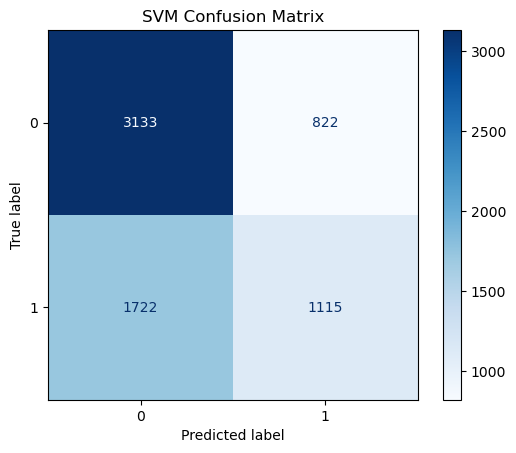

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Define features and target
X = df.drop(columns=['play_type_numeric'])  # Replace with your actual target column if different
y = df['play_type_numeric']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SVM with default parameters (linear kernel)
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Display the confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(svm_model, X_test, y_test, cmap='Blues')
disp.ax_.set_title("SVM Confusion Matrix")
disp.figure_.show()


SVM Accuracy: 0.5982037691401649

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.95      0.73      3955
           1       0.61      0.11      0.18      2837

    accuracy                           0.60      6792
   macro avg       0.60      0.53      0.46      6792
weighted avg       0.60      0.60      0.50      6792



C:\Users\sleep\AppData\Local\Temp\ipykernel_29280\3388965402.py:27: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  disp.figure_.show()


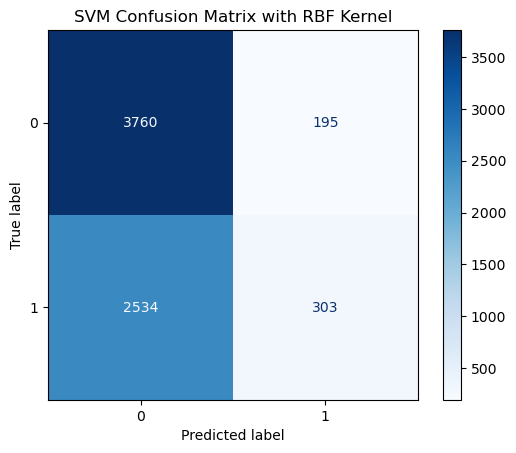

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Define features and target
X = df.drop(columns=['play_type_numeric'])  # Replace with your actual target column if different
y = df['play_type_numeric']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SVM with RBF kernel
svm_model = SVC(kernel='poly', C=1.0, gamma='scale', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Display the confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(svm_model, X_test, y_test, cmap='Blues')
disp.ax_.set_title("SVM Confusion Matrix with RBF Kernel")
disp.figure_.show()


SVM Accuracy: 0.5259128386336867

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.59      0.59      3955
           1       0.43      0.43      0.43      2837

    accuracy                           0.53      6792
   macro avg       0.51      0.51      0.51      6792
weighted avg       0.53      0.53      0.53      6792



C:\Users\sleep\AppData\Local\Temp\ipykernel_25576\473794885.py:27: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  disp.figure_.show()


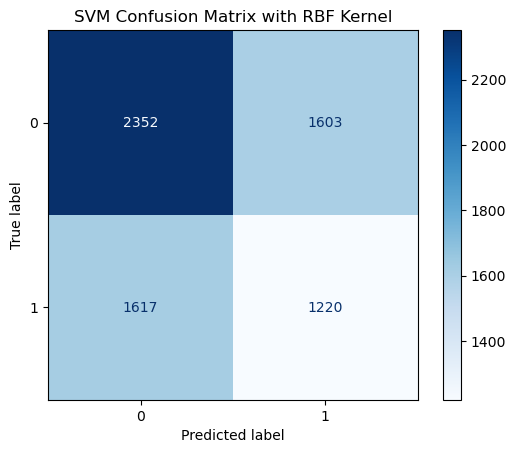

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Define features and target
X = df.drop(columns=['play_type_numeric'])  # Replace with your actual target column if different
y = df['play_type_numeric']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SVM with RBF kernel
svm_model = SVC(kernel='sigmoid', C=1.0, gamma='scale', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Display the confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(svm_model, X_test, y_test, cmap='Blues')
disp.ax_.set_title("SVM Confusion Matrix with RBF Kernel")
disp.figure_.show()